## Dataset

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

In [384]:

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## for statistical tests
import scipy

## for machine learning
from sklearn import preprocessing, impute, utils, linear_model, feature_selection, model_selection, metrics, ensemble

In [385]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


## for statistical tests
import scipy

## for machine learning
from sklearn import preprocessing, impute, utils, linear_model, feature_selection, model_selection, metrics, ensemble


%matplotlib inline

In [386]:
dtf = pd.read_csv('aug_train.csv')
# test_df = pd.read_csv('aug_test.csv')
dtf.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [387]:
dtf.drop(columns=['enrollee_id'], inplace=True)

In [388]:
dtf = dtf.rename(columns={"target":"Y"})

In [389]:
dtf

city  city_development_index gender      relevent_experience  \
0      city_103                   0.920   Male  Has relevent experience   
1       city_40                   0.776   Male   No relevent experience   
2       city_21                   0.624    NaN   No relevent experience   
3      city_115                   0.789    NaN   No relevent experience   
4      city_162                   0.767   Male  Has relevent experience   
...         ...                     ...    ...                      ...   
19153  city_173                   0.878   Male   No relevent experience   
19154  city_103                   0.920   Male  Has relevent experience   
19155  city_103                   0.920   Male  Has relevent experience   
19156   city_65                   0.802   Male  Has relevent experience   
19157   city_67                   0.855    NaN   No relevent experience   

      enrolled_university education_level major_discipline experience  \
0           no_enrollment        Graduate             STEM        >20   
1           no_enrollment        Graduate             STEM         15   
2        Full time course        Graduate             STEM          5   
3                     NaN        Graduate  Business Degree         <1   
4           no_enrollment         Masters             STEM        >20   
...                   ...             ...              ...        ...   
19153       no_enrollment        Graduate       Humanities         14   
19154       no_enrollment        Graduate             STEM         14   
19155       no_enrollment        Graduate             STEM        >20   
19156       no_enrollment     High School              NaN         <1   
19157       no_enrollment  Primary School              NaN          2   

      company_size    company_type last_new_job  training_hours    Y  
0              NaN             NaN            1              36  1.0  
1            50-99         Pvt Ltd           >4              47  0.0  
2              NaN             NaN        never              83  0.0  
3              NaN         Pvt Ltd        never              52  1.0  
4            50-99  Funded Startup            4               8  0.0  
...            ...             ...          ...             ...  ...  
19153          NaN             NaN            1              42  1.0  
19154          NaN             NaN            4              52  1.0  
19155        50-99         Pvt Ltd            4              44  0.0  
19156      500-999         Pvt Ltd            2              97  0.0  
19157          NaN             NaN            1             127  0.0  

[19158 rows x 13 columns]

In [390]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  Y                       19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


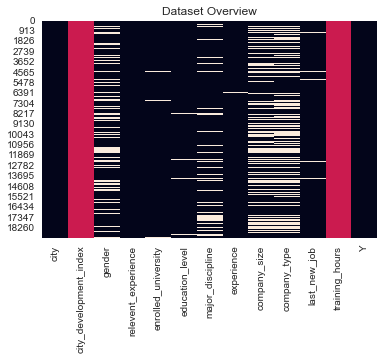

 Categerocial   Numeric   NaN 


In [391]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

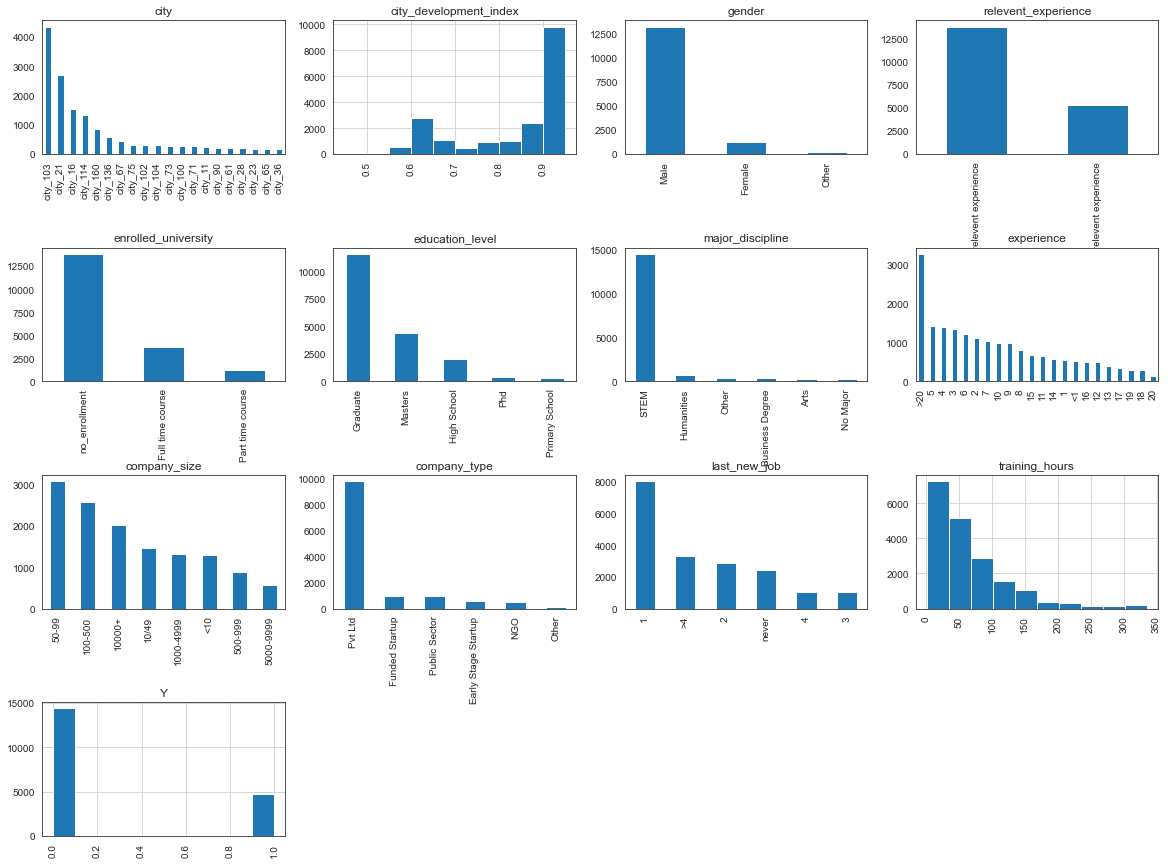

In [392]:
fig = plt.figure(figsize=(20,15))
cols = 4
rows = math.ceil(float(dtf.shape[1]) / cols)
for i, column in enumerate(dtf.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if column == 'city':
        dtf[column].value_counts()[:20].plot(kind="bar", axes=ax)
    elif dtf.dtypes[column] == np.object:
        dtf[column].value_counts().plot(kind="bar", axes=ax)
    else:
        dtf[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

## Target

In [393]:
targets_counts = dtf['Y'].value_counts()
n_seekers_count = targets_counts[0]
seekers_count = targets_counts[1]

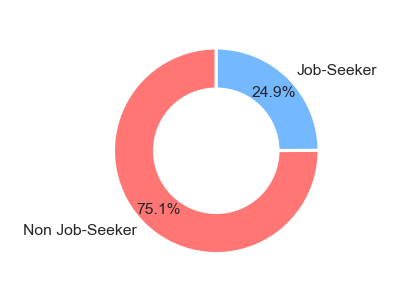

In [394]:
category_names = ['Non Job-Seeker', 'Job-Seeker']
sizes = [n_seekers_count, seekers_count]
custom_colours = ['#ff7675','#74b9ff']

plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize':5}, startangle=90,autopct='%1.1f%%',pctdistance=0.8,
        colors= custom_colours,)

# draw circle
center_circle = plt.Circle((0,0), radius=0.6, fc='white')
# plt.gca() to get current axis
plt.gca().add_artist(center_circle)

plt.show()

## Education Level

- Graduate
- Masters
- High School
- PhD
- Primary School

In [395]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

el = dtf['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(dtf)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='Education_level', 
    width=800,
    height=500 
)

fig.show()

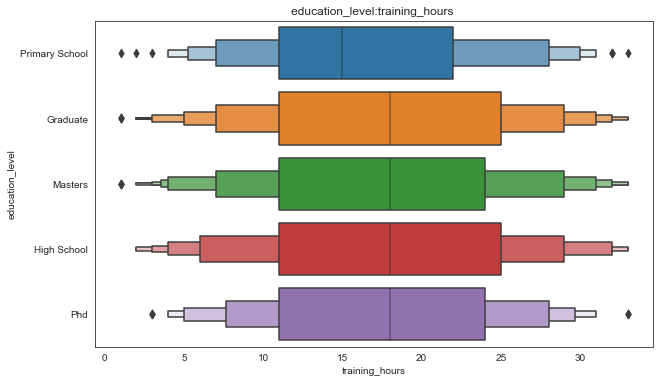

In [396]:
et = dtf.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.boxenplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:training_hours ')
plt.show()

# City development index

In [397]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

cd = dtf['city_development_index'].value_counts().reset_index()
cd.columns = [
    'city_development_index', 
    'count'
]
cd['city_development_index'] = cd['city_development_index'].astype(str) + '-'
cd = cd.sort_values(['count']).tail(50)

fig = px.area(
    cd, 
    x='count', 
    y='city_development_index', 
    orientation='h', 
    title='Count: City development index', 
    width=1000,
    height=900 
)

fig.show()

## City by city development index

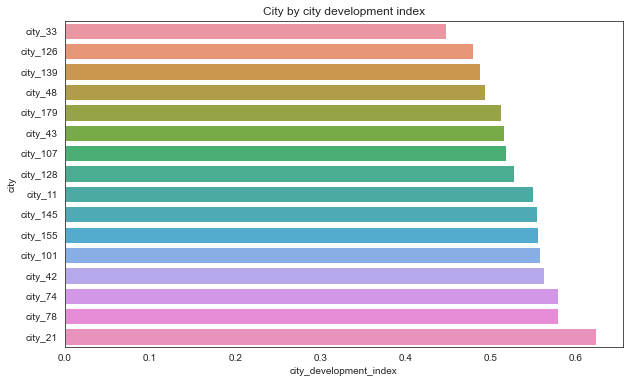

In [398]:
cdi = dtf.sort_values(by='city_development_index', ascending=True)[:3000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

Text(0.5, 1.0, 'Distributional of city_development_index')

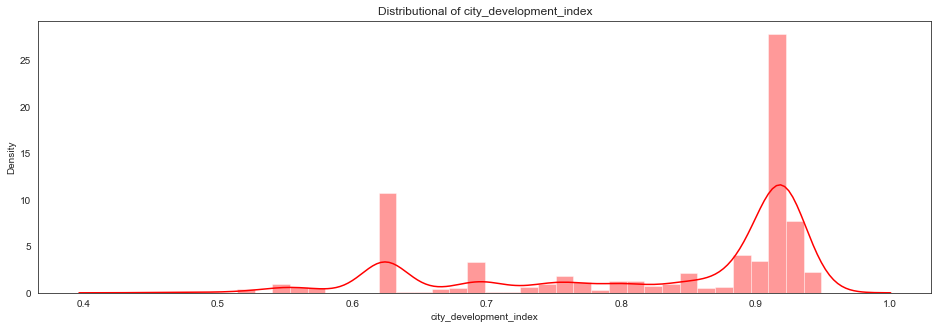

In [399]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(dtf["city_development_index"], color="red",ax = axes)
plt.title("Distributional of city_development_index")

## Experience

In [400]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = dtf['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(dtf)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

## Taining_hours

Text(0.5, 1.0, 'Distributional of training_hours')

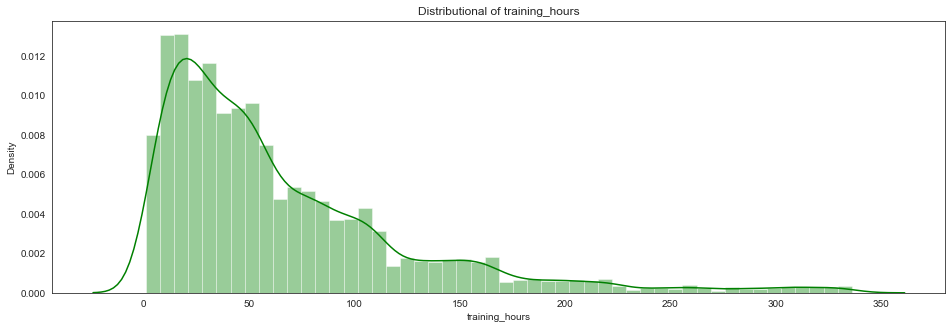

In [401]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(dtf["training_hours"], color="green",ax = axes)
plt.title("Distributional of training_hours")

## Gender

<AxesSubplot:xlabel='count', ylabel='gender'>

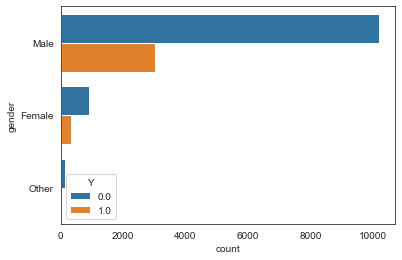

In [402]:
sns.countplot(y='gender', hue='Y', data=dtf,)

## Relevent Experience

<AxesSubplot:xlabel='count', ylabel='relevent_experience'>

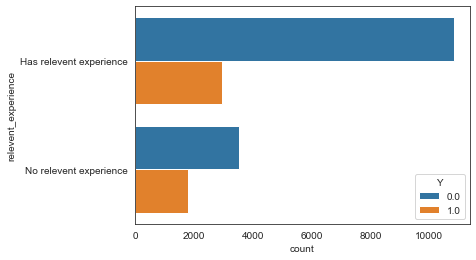

In [403]:
sns.countplot(y='relevent_experience', hue='Y', data=dtf,)

## Last New Job

<AxesSubplot:>

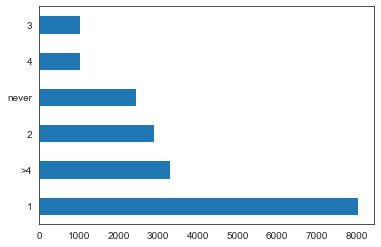

In [404]:
dtf['last_new_job'].value_counts().plot(kind='barh')

## Enrolled University

<AxesSubplot:>

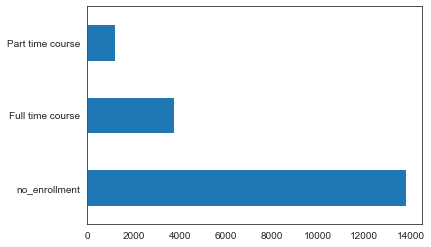

In [405]:
dtf['enrolled_university'].value_counts().plot(kind='barh')

## Company Size

<AxesSubplot:>

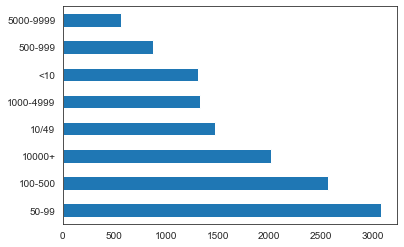

In [406]:
dtf['company_size'].value_counts().plot(kind='barh')

## Experience

<AxesSubplot:>

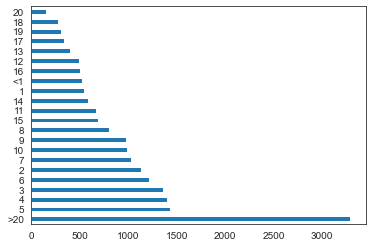

In [407]:
dtf['experience'].value_counts().plot(kind='barh')

## Features & Target

In [408]:
dtf['last_new_job'] = dtf['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) 
dtf['enrolled_university'][dtf['enrolled_university'] == 'no_enrollment'] = 'No Enrollment'
dtf['company_size'] = dtf['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) 
dtf['experience'] = dtf['experience'].apply(lambda x: '0' if x == '<1' else x)
dtf['experience'] = dtf['experience'].apply(lambda x: '20' if x == '>20' else x)
dtf['relevent_experience'] = dtf['relevent_experience'].apply(lambda x: 1 if x == 'Has relevent experience' else 0)

## Missing Values

In [409]:
pd.isnull(dtf).any() # Method 1

city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
Y                         False
dtype: bool

### finding mean value for university enrollment

In [410]:
enrolled_university = dtf[ dtf['Y'] == 1]['enrolled_university']

In [411]:
enrolled_university = enrolled_university.apply(lambda x: 0 if x == 'No Enrollment' else 1 if x == 'Part time course' else 2)
enrolled_university.value_counts()

0    2921
2    1554
1     302
Name: enrolled_university, dtype: int64

In [412]:
enrolled_university.mean()

0.7138371362779987

In [413]:
enrolled_university = dtf[ dtf['Y'] == 0]['enrolled_university']

In [414]:
enrolled_university = enrolled_university.apply(lambda x: 0 if x == 'No Enrollment' else 1 if x == 'Part time course' else 2)
enrolled_university.value_counts()

0    10896
2     2589
1      896
Name: enrolled_university, dtype: int64

In [415]:
enrolled_university.mean()

0.42236283985814616

### finding mean value for company size

In [416]:
company_size = dtf['company_size']
company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [417]:
def transform_company_size(x):
    if x == '<10':
        return 0
    elif x == '50-99':
        return 1
    elif x == '100-500':
        return 2
    elif x == '500-999':
        return 3
    elif x == '1000-4999':
        return 4
    elif x == '5000-9999':
        return 5
    elif x == '10000+':
        return 6

In [418]:
company_size = dtf['company_size'].apply(transform_company_size)
company_size = company_size.astype(str).astype(float)
company_size.value_counts()

1.0    3083
2.0    2571
6.0    2019
4.0    1328
0.0    1308
3.0     877
5.0     563
Name: company_size, dtype: int64

In [419]:
company_size.mean()

2.6467784492297217

In [420]:
dtf['company_size'] = company_size

### finding mean value for education level

In [421]:
dtf['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [422]:
def transform_education_level(x):
    if x == 'Primary School':
        return 0
    elif x == 'High School':
        return 1
    elif x == 'Graduate':
        return 2
    elif x == 'Masters':
        return 3
    elif x == 'Phd':
        return 4

In [423]:
education_level = dtf['education_level'].apply(lambda x: transform_education_level(x))

In [424]:
education_level.mean()

2.136699112204514

In [425]:
# dtf['education_level'].fillna(2,inplace=True)

### finding mean value for experience

In [426]:
experience = dtf['experience'].apply(lambda x : '0' if x == '<1' else x )
experience = dtf['experience'].apply(lambda x : '20' if x == '>20' else x )
experience = dtf['experience'].astype(str).astype(float)
dtf['experience'] = experience

In [427]:
experience.mean()

9.92803645315037

In [428]:
# dtf['experience'].fillna(10)

In [429]:
# dtf['Y'].groupby(dtf['gender']).mean()

In [430]:
dtf.isna().sum()/len(dtf)

city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.386731
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
Y                         0.000000
dtype: float64

### finding mean value for education level

In [431]:
dtf['last_new_job'].unique()

array(['1', '>4', 'Never', '4', '3', '2', nan], dtype=object)

In [432]:
last_new_job = dtf['last_new_job'].apply(lambda x : '0' if x == 'Never' else x )
last_new_job = last_new_job.apply(lambda x : '5' if x == '>4' else x )
last_new_job = last_new_job.astype(str).astype(float)
last_new_job

0        1.0
1        5.0
2        0.0
3        0.0
4        4.0
        ... 
19153    1.0
19154    4.0
19155    4.0
19156    2.0
19157    1.0
Name: last_new_job, Length: 19158, dtype: float64

In [433]:
dtf['last_new_job'] = last_new_job

In [434]:
last_new_job.mean()

2.0004270082732853

In [435]:
# dtf['last_new_job'].fillna(2, inplace=True)

In [436]:
dtf.dropna(inplace=True)

In [437]:
dtf.isna().sum()/len(dtf)

city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
Y                         0.0
dtype: float64

In [438]:
dtf['training_hours'] = dtf['training_hours'].astype(str).astype(int)

In [439]:
# Fill nulls
dtf['company_type'].fillna('Unknown',inplace=True)
dtf['major_discipline'].fillna('Unknown',inplace=True)
dtf['gender'].fillna('Not provided',inplace=True)

# other
dtf['company_size'].fillna(3,inplace=True) ## fill with mean

In [440]:
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

[Text(0.2, 0, 'Graduate'),
 Text(1.2, 0, 'High School'),
 Text(2.2, 0, 'Masters'),
 Text(3.2, 0, 'Phd'),
 Text(4.2, 0, 'Primary School')]

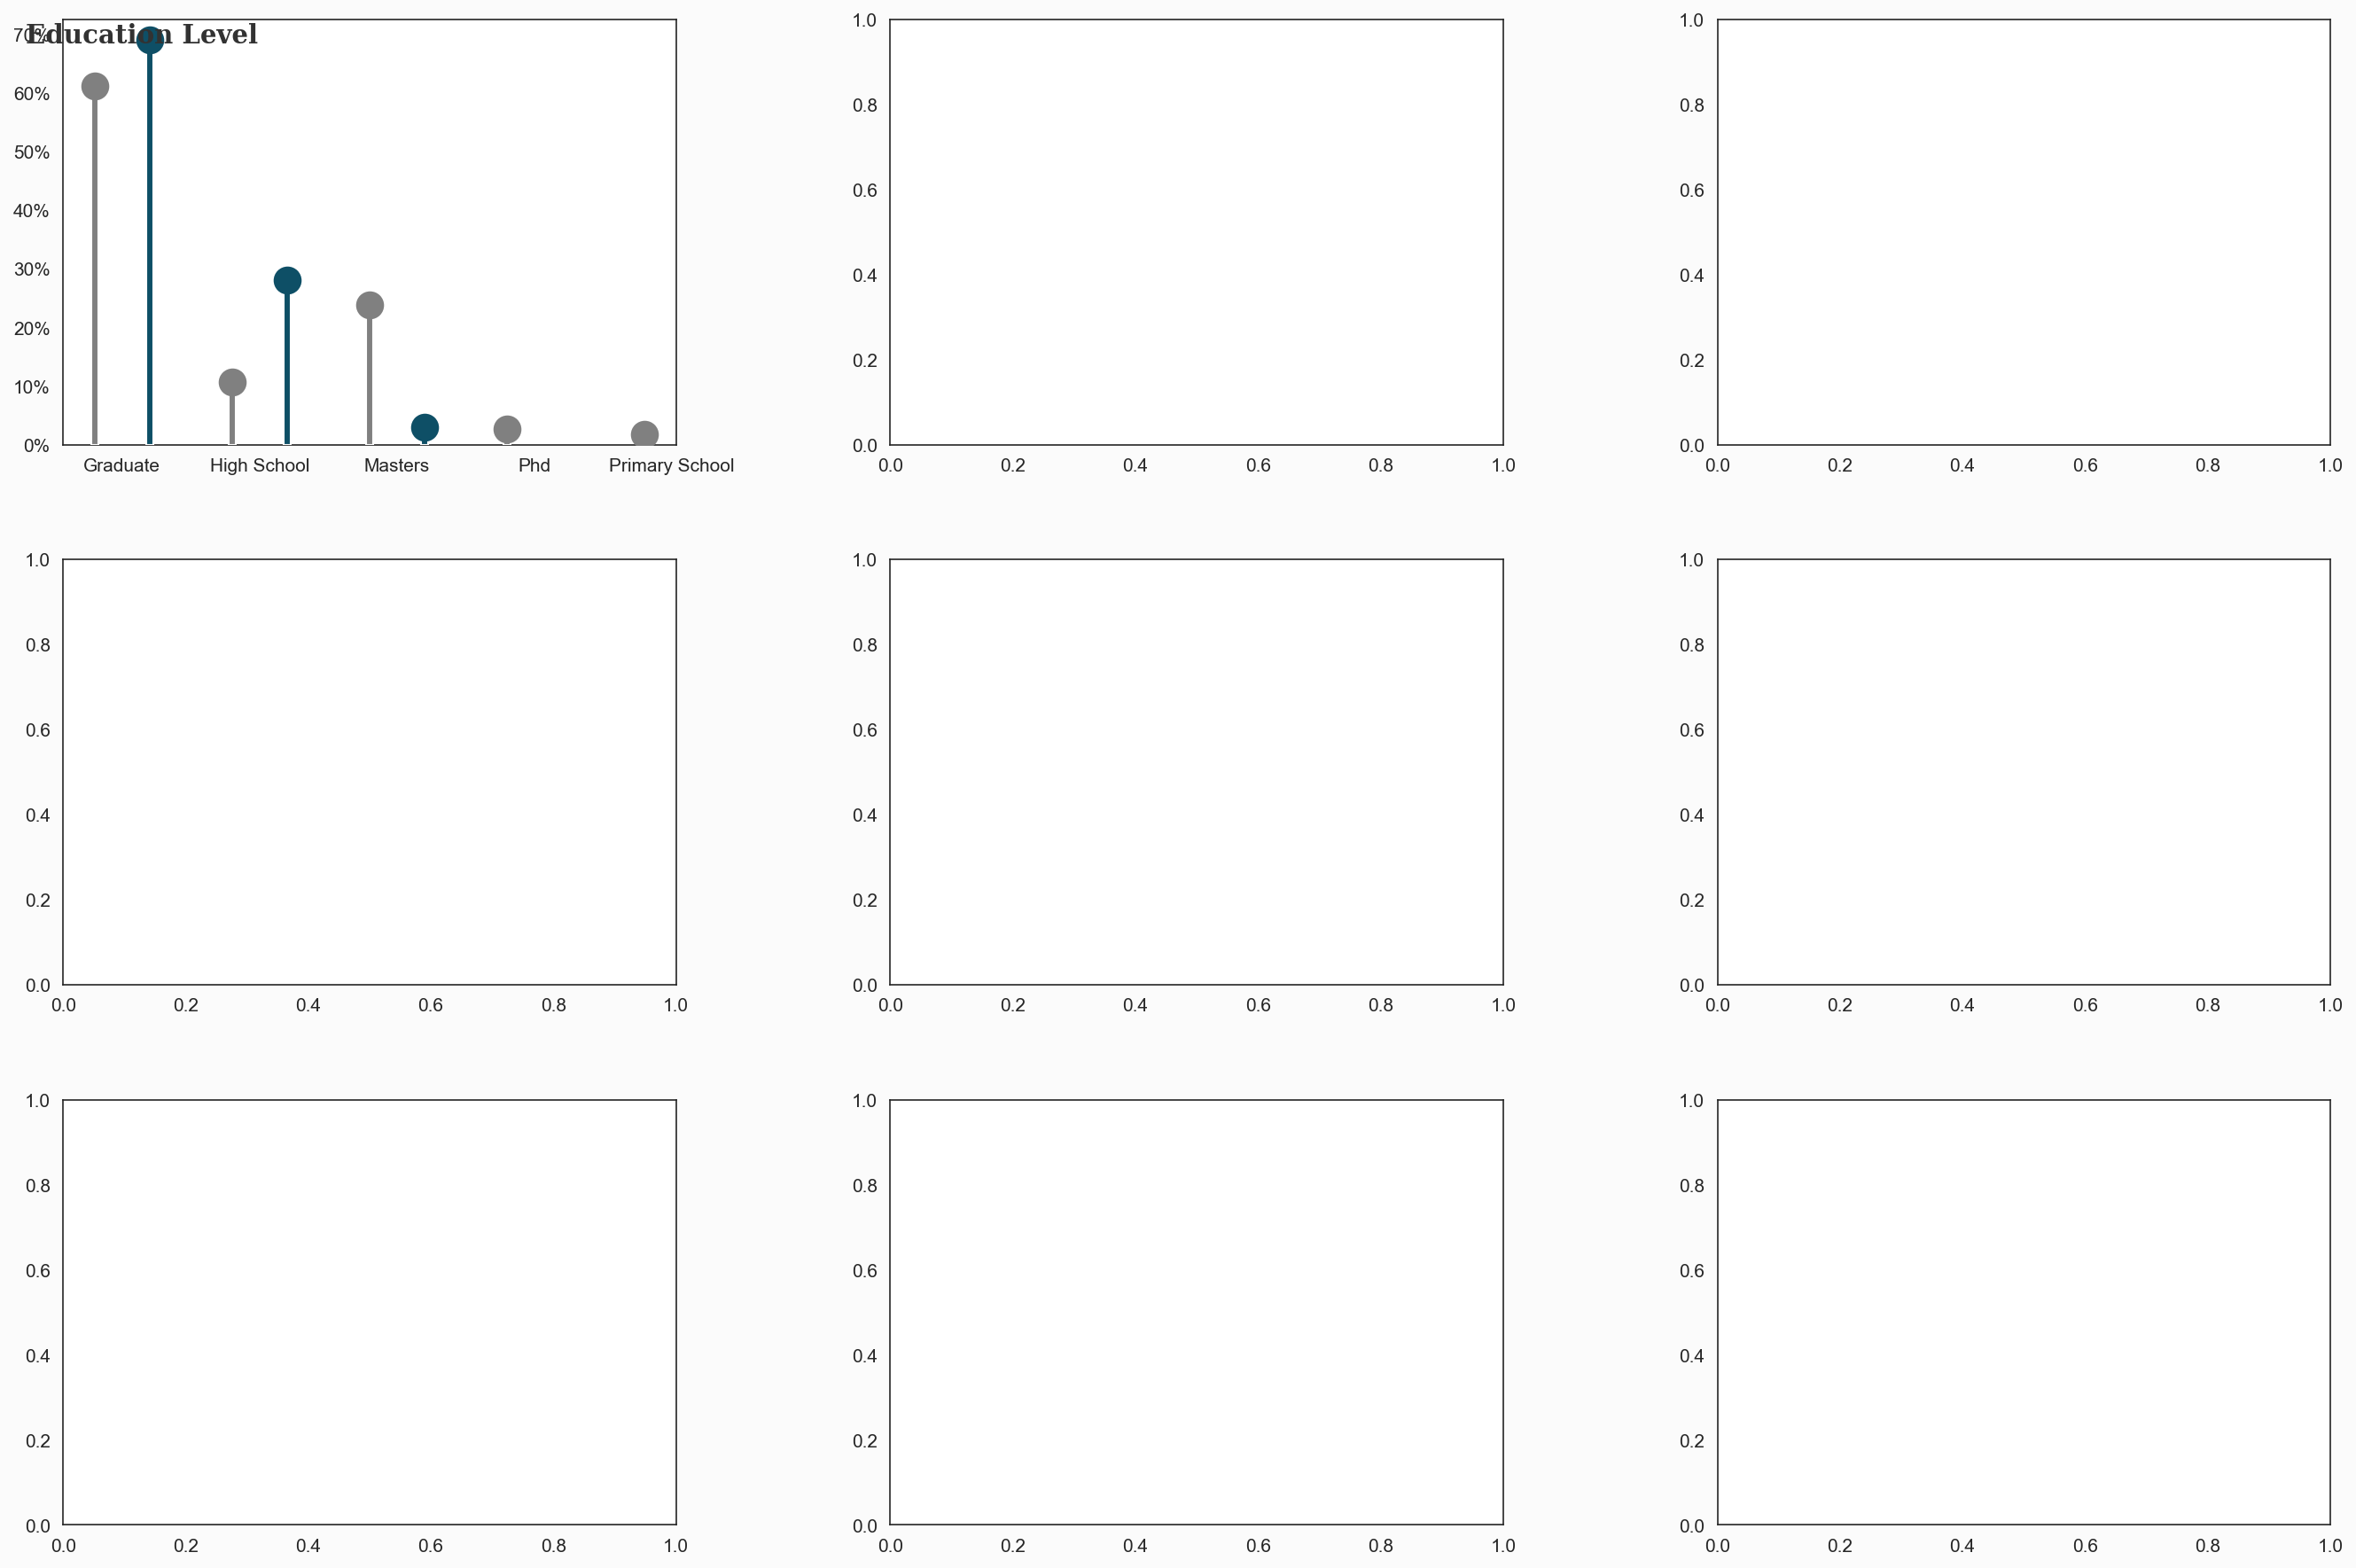

In [441]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])


# Ax0 - EDUCATION LEVEL
train = pd.DataFrame(test_df["education_level"].value_counts())
train["Percentage"] = train["education_level"].apply(lambda x: x/sum(train["education_level"])*100)
train = train.sort_index()

test = pd.DataFrame(dtf["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], zorder=3, color="gray", width=0.05)
ax0.scatter(np.arange(len(train.index)), train["Percentage"], zorder=3,s=200, color="gray")
ax0.bar(np.arange(len(test.index))+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.05)
ax0.scatter(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3,s=200, color="#0e4f66")
ax0.text(-0.5, 68.5, 'Education Level', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax0.set_xticklabels(list(train.index),rotation=0)


In [442]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 1 to 19155
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    8004 non-null   object 
 1   city_development_index  8004 non-null   float64
 2   gender                  8004 non-null   object 
 3   relevent_experience     8004 non-null   int64  
 4   enrolled_university     8004 non-null   object 
 5   education_level         8004 non-null   object 
 6   major_discipline        8004 non-null   object 
 7   experience              8004 non-null   float64
 8   company_size            8004 non-null   float64
 9   company_type            8004 non-null   object 
 10  last_new_job            8004 non-null   float64
 11  training_hours          8004 non-null   int32  
 12  Y                       8004 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 844.2+ KB


In [443]:
dtf.corr() # Pearson Correlation Coefficients 

city_development_index  relevent_experience  \
city_development_index                1.000000            -0.009884   
relevent_experience                  -0.009884             1.000000   
experience                            0.328431             0.129747   
company_size                          0.060952            -0.058548   
last_new_job                          0.158087             0.024449   
training_hours                       -0.009709             0.015048   
Y                                    -0.409786            -0.033487   

                        experience  company_size  last_new_job  \
city_development_index    0.328431      0.060952      0.158087   
relevent_experience       0.129747     -0.058548      0.024449   
experience                1.000000      0.078547      0.414304   
company_size              0.078547      1.000000      0.097635   
last_new_job              0.414304      0.097635      1.000000   
training_hours           -0.004597     -0.019352     -0.015305   
Y                        -0.185799      0.016552     -0.065139   

                        training_hours         Y  
city_development_index       -0.009709 -0.409786  
relevent_experience           0.015048 -0.033487  
experience                   -0.004597 -0.185799  
company_size                 -0.019352  0.016552  
last_new_job                 -0.015305 -0.065139  
training_hours                1.000000 -0.006345  
Y                            -0.006345  1.000000

In [444]:
mask = np.zeros_like(dtf.corr())

triangle_indecies = np.triu_indices_from(mask)
mask[triangle_indecies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

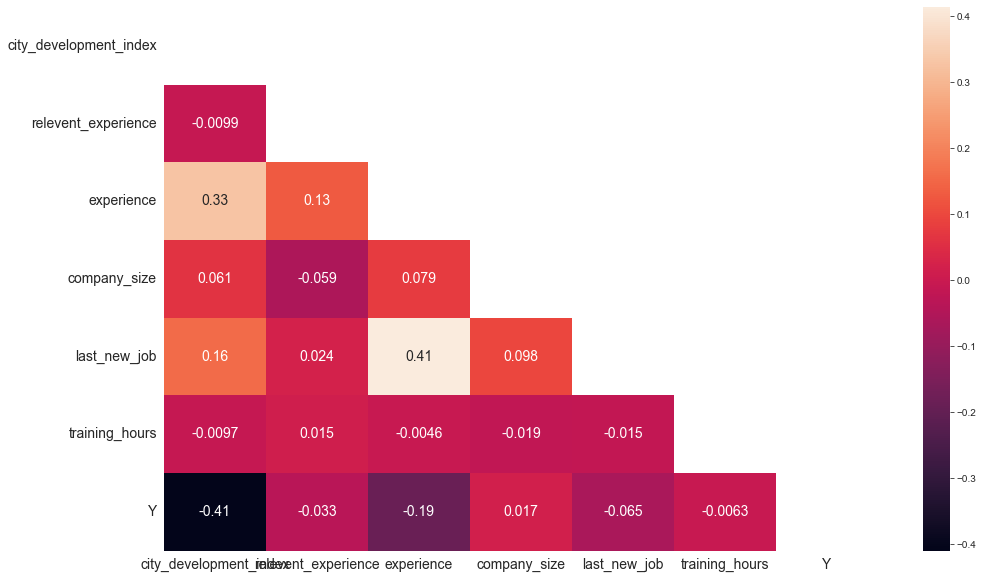

In [445]:
plt.figure(figsize=(16,10))
sns.set_style('white')
sns.heatmap(dtf.corr(),mask=mask,annot=True,annot_kws={"size":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

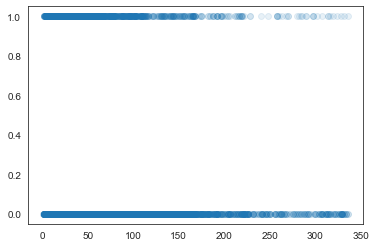

In [446]:
plt.scatter(x=dtf['training_hours'],y=dtf['Y'], alpha=0.1)
plt.show()

In [447]:
# Extra libs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.svm import LinearSVC
# from imblearn.over_sampling import BorderlineSMOTE
from numpy import where

In [448]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 1 to 19155
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    8004 non-null   object 
 1   city_development_index  8004 non-null   float64
 2   gender                  8004 non-null   object 
 3   relevent_experience     8004 non-null   int64  
 4   enrolled_university     8004 non-null   object 
 5   education_level         8004 non-null   object 
 6   major_discipline        8004 non-null   object 
 7   experience              8004 non-null   float64
 8   company_size            8004 non-null   float64
 9   company_type            8004 non-null   object 
 10  last_new_job            8004 non-null   float64
 11  training_hours          8004 non-null   int32  
 12  Y                       8004 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 844.2+ KB


In [449]:
dtf.education_level.unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [450]:
aug_train.education_level.unique()

array([0, 1, 2])

In [451]:
dtf.major_discipline.unique()

array(['STEM', 'Humanities', 'Business Degree', 'Other', 'No Major',
       'Arts'], dtype=object)

In [452]:
dtf.company_type

1               Pvt Ltd
4        Funded Startup
7               Pvt Ltd
8               Pvt Ltd
11              Pvt Ltd
              ...      
19146           Pvt Ltd
19147           Pvt Ltd
19149           Pvt Ltd
19150     Public Sector
19155           Pvt Ltd
Name: company_type, Length: 8004, dtype: object

In [458]:
list_of_columns = ['gender', 'enrolled_university', 'education_level',
                   'major_discipline', 'company_type']

aug_train = dtf

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in list_of_columns:
    aug_train[col] = encoder.fit_transform(dtf[col].astype(str))


# aug_train = aug_train.drop('count', 1)

# Final look at our df
aug_train.head(3)

city_development_index  gender  relevent_experience  enrolled_university  \
1                   0.776       1                    0                    1   
4                   0.767       1                    1                    1   
7                   0.762       1                    1                    1   

   education_level  major_discipline  experience  company_size  company_type  \
1                0                 5        15.0           1.0             5   
4                1                 5        20.0           1.0             1   
7                0                 5        13.0           0.0             5   

   last_new_job  training_hours    Y  
1           5.0              47  0.0  
4           4.0               8  0.0  
7           5.0              18  1.0

In [459]:
aug_train.sample(10)

city_development_index  gender  relevent_experience  \
9699                    0.939       1                    1   
18422                   0.624       1                    0   
11084                   0.926       1                    1   
7929                    0.920       1                    1   
4254                    0.827       1                    1   
10717                   0.830       1                    1   
6997                    0.920       1                    0   
2463                    0.920       0                    1   
15535                   0.920       1                    1   
17940                   0.920       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
9699                     1                0                 5        20.0   
18422                    1                1                 5        10.0   
11084                    1                0                 5        17.0   
7929                     1                0                 5        20.0   
4254                     1                0                 5        20.0   
10717                    1                1                 5         8.0   
6997                     0                0                 5         4.0   
2463                     1                0                 5        15.0   
15535                    1                1                 5        20.0   
17940                    1                0                 5         5.0   

       company_size  company_type  last_new_job  training_hours    Y  
9699            2.0             2           5.0              82  0.0  
18422           3.0             4           4.0              33  1.0  
11084           1.0             5           5.0             114  1.0  
7929            1.0             5           5.0             154  0.0  
4254            6.0             5           5.0             188  0.0  
10717           1.0             4           3.0              27  0.0  
6997            3.0             5           1.0              82  0.0  
2463            6.0             5           2.0             320  0.0  
15535           2.0             5           1.0              28  0.0  
17940           5.0             5           2.0              25  0.0

In [460]:
aug_train.drop(columns=['city'], inplace=True)

KeyError: "['city'] not found in axis"

In [461]:
X = aug_train.dropna().drop(columns=['Y'])
y = aug_train.dropna()['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [462]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 1 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  8004 non-null   float64
 1   gender                  8004 non-null   int32  
 2   relevent_experience     8004 non-null   int64  
 3   enrolled_university     8004 non-null   int32  
 4   education_level         8004 non-null   int32  
 5   major_discipline        8004 non-null   int32  
 6   experience              8004 non-null   float64
 7   company_size            8004 non-null   float64
 8   company_type            8004 non-null   int32  
 9   last_new_job            8004 non-null   float64
 10  training_hours          8004 non-null   int32  
 11  Y                       8004 non-null   float64
dtypes: float64(5), int32(6), int64(1)
memory usage: 625.3 KB


In [273]:

# # Classification with a linear SVM
# svc = LinearSVC(dual=False, random_state=123)
# params_grid = {"C": [10 ** k for k in range(-3, 4)]}
# clf = GridSearchCV(svc, params_grid)
# clf.fit(X_train, y_train)
# print(
#     "Accuracy on the test set with raw data: {:.3f}".format(clf.score(X_test, y_test))
# )

# print(clf.best_params_)

In [514]:
models_fscore = {}

In [463]:
clf_all = DecisionTreeClassifier()
clf_all.fit(X_train, y_train)

DecisionTreeClassifier()

In [464]:
clf_all.score(X_test, y_test)

0.7747710241465445

[3.23253748 0.19378716 0.22327641 0.30988715 0.27033486 0.28278876
 1.02382443 0.79820251 0.36573799 0.49970431 2.79991894]


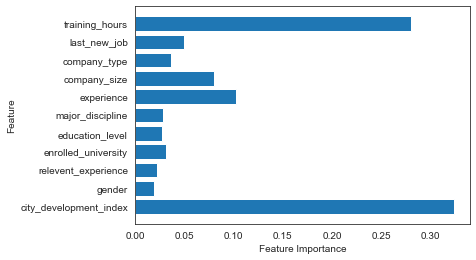

In [465]:
#طبعنا أهم الفيتشرز
print(clf_all.feature_importances_ * 10)
import numpy as np
n_features = X_train.shape[1]
plt.barh(range(n_features), clf_all.feature_importances_[:n_features], align='center')
plt.yticks(np.arange(n_features), X_train.columns[:n_features] )
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [484]:
from sklearn.ensemble import RandomForestClassifier

In [496]:
rtc = RandomForestClassifier()
rtc.fit(X_train, y_train)

RandomForestClassifier()

[3.05036301 0.20279912 0.17975007 0.25580505 0.3151457  0.18468507
 1.39373981 0.89429894 0.37312609 0.68580478 2.46448236]


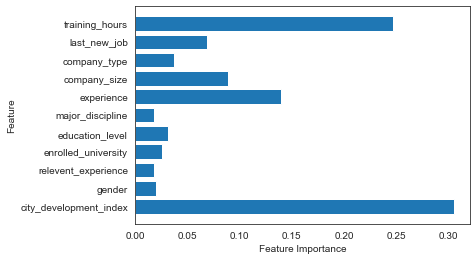

In [497]:
#طبعنا أهم الفيتشرز
print(rtc.feature_importances_ * 10)
import numpy as np
n_features = X_train.shape[1]
plt.barh(range(n_features), rtc.feature_importances_[:n_features], align='center')
plt.yticks(np.arange(n_features), X_train.columns[:n_features] )
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [498]:
rtc.score(X_test, y_test)

0.8451290591174022

In [499]:
mask = np.zeros_like(dtf.corr())

triangle_indecies = np.triu_indices_from(mask)
mask[triangle_indecies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

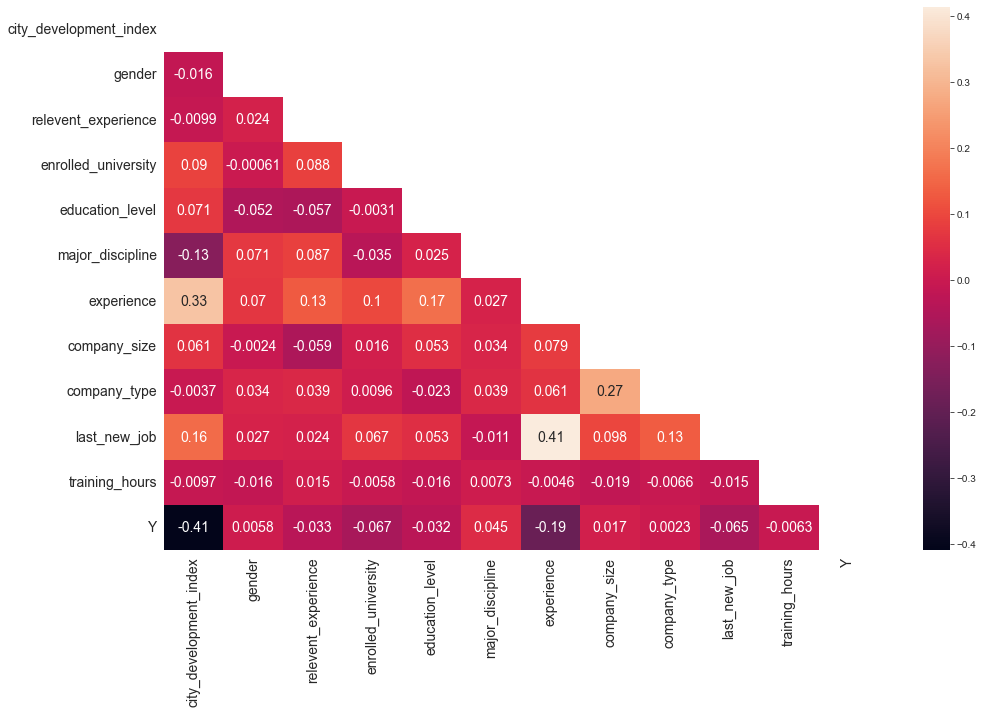

In [474]:
plt.figure(figsize=(16,10))
sns.set_style('white')
sns.heatmap(dtf.corr(),mask=mask,annot=True,annot_kws={"size":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [516]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report


def train_and_test(classifier, X_train, X_test, y_train, y_test, name):
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
#     roc_auc = classifier.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)

    # ploting confustion matrix
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()

    # print scores
    print ("accuracy  score: {} %".format(accuracy))
    print ("auc  score: {} ".format(roc_auc))
    print(classification_rep)
    
    print ("Train set accurecy: {:.2f} ".format(tree_clf.score(X_train_l1,y_train)))
    print ("Test set accurecy: {:.2f} ".format(tree_clf.score(X_test_l1,y_test)))

    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
    models_fscore[name] = f1_score(y_test, y_pred)

    # print ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return f1_score(y_test, y_pred)

In [517]:
X.shape

(8004, 11)

In [518]:
y.shape

(8004,)

In [519]:
from sklearn.feature_selection import RFE
### your code here
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select= 7)

select = rfe.fit(X_train,y_train)
# X_train_l1, X_test_l1, y_train, y_test = train_test_split(fea)

X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

In [520]:
select.get_feature_names_out()

array(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours'],
      dtype=object)

In [521]:
#بعمل اوبجيكت من مصنف شجرة القرار
tree_clf = RandomForestClassifier(random_state=42) #max_depth: ارتفاع (عمق الشجرة)
#random_state=42 لتثبيت الخرج
tree_clf.fit(X_train_l1, y_train) #درّب 

RandomForestClassifier(random_state=42)

In [522]:
from sklearn.metrics import f1_score

y_pred = tree_clf.predict(X_test_l1)
print ("Train set accurecy: {:.2f} ".format(tree_clf.score(X_train_l1,y_train)))
print ("Test set accurecy: {:.2f} ".format(tree_clf.score(X_test_l1,y_test)))

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))


Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.85
Precision: 0.53
Recall: 0.31
F1: 0.39


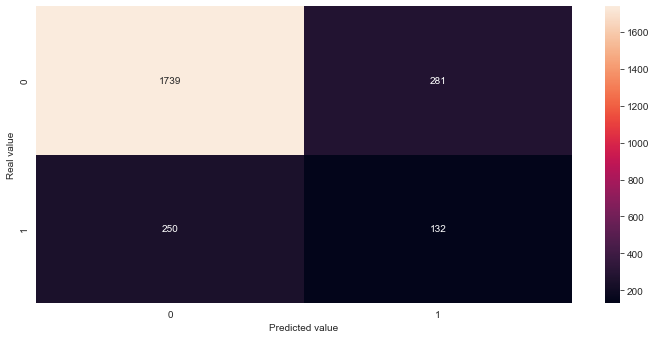

accuracy  score: 0.7789342214820982 %
auc  score: 0.603220413664403 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      2020
         1.0       0.32      0.35      0.33       382

    accuracy                           0.78      2402
   macro avg       0.60      0.60      0.60      2402
weighted avg       0.79      0.78      0.78      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.78
Precision: 0.32
Recall: 0.35
F1: 0.33


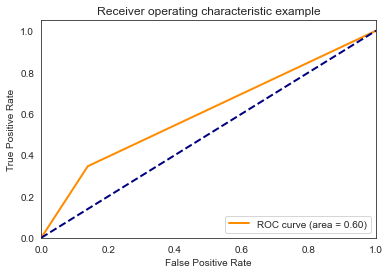

0.3320754716981132

In [523]:
train_and_test(DecisionTreeClassifier(random_state=42), X_train_l1, X_test_l1, y_train, y_test, 'DecisionTreeClassifier')

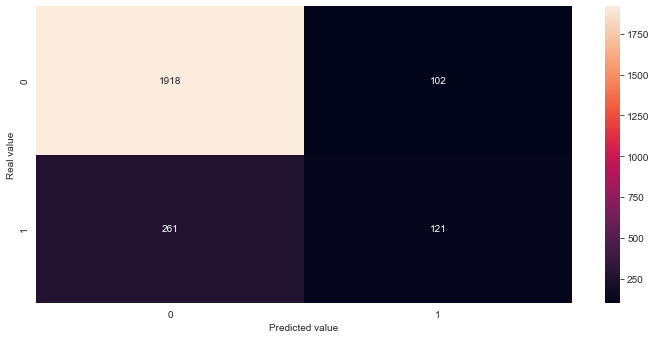

accuracy  score: 0.8488759367194005 %
auc  score: 0.6331294385983101 
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      2020
         1.0       0.54      0.32      0.40       382

    accuracy                           0.85      2402
   macro avg       0.71      0.63      0.66      2402
weighted avg       0.83      0.85      0.83      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.85
Precision: 0.54
Recall: 0.32
F1: 0.40


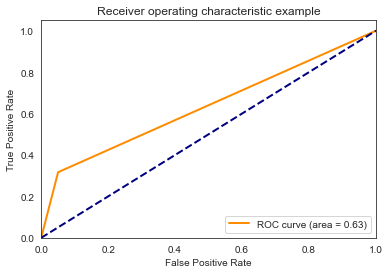

0.39999999999999997

In [525]:
train_and_test(RandomForestClassifier(random_state=42,max_leaf_nodes=30), X_train_l1, X_test_l1, y_train, y_test, 'RandomForestClassifier')

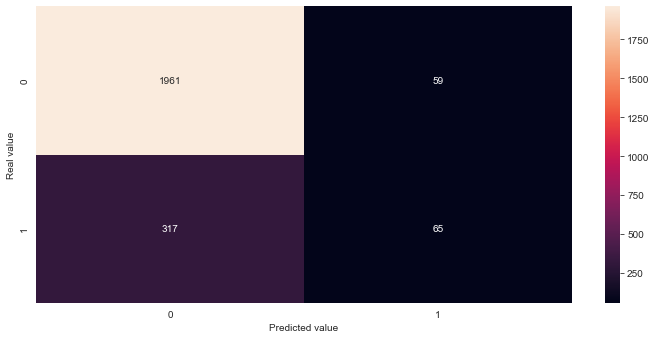

accuracy  score: 0.8434637801831807 %
auc  score: 0.570474573635374 
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2020
         1.0       0.52      0.17      0.26       382

    accuracy                           0.84      2402
   macro avg       0.69      0.57      0.58      2402
weighted avg       0.81      0.84      0.81      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.84
Precision: 0.52
Recall: 0.17
F1: 0.26


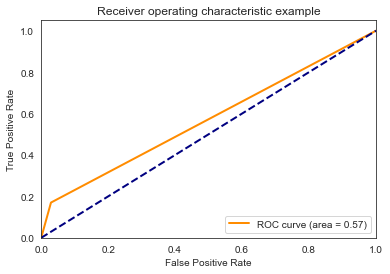

0.2569169960474308

In [526]:
score = train_and_test(LogisticRegression(random_state=42), X_train_l1, X_test_l1, y_train, y_test , 'LogisticRegression')
score

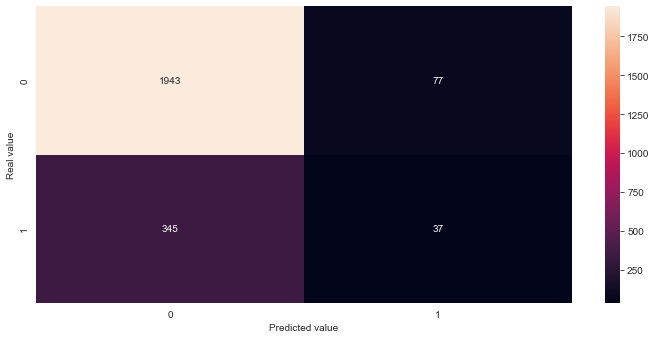

accuracy  score: 0.8243130724396336 %
auc  score: 0.5293699134311337 
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      2020
         1.0       0.32      0.10      0.15       382

    accuracy                           0.82      2402
   macro avg       0.59      0.53      0.53      2402
weighted avg       0.77      0.82      0.78      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.82
Precision: 0.32
Recall: 0.10
F1: 0.15


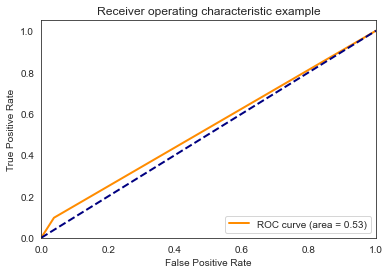

0.14919354838709678

In [527]:
score = train_and_test(KNeighborsClassifier(), X_train_l1, X_test_l1, y_train, y_test, 'KNeighborsClassifier')
score

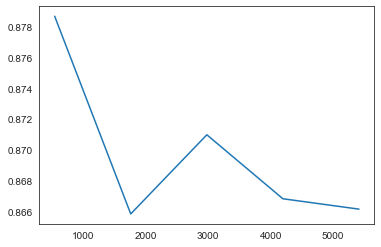

In [552]:

# from sklearn.model_selection import learning_curve


# N, train_lc, val_lc = learning_curve(DecisionTreeClassifier(),#الموديل
#                                          X_train, y_train, cv=7,
# #                                          train_sizes= np.linspace(0.3, 1, 25)
#                                     )#عم اقسم الداتا من تلتا ل كلها

# ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
# ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
# ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
#              color='gray', linestyle='dashed')

# ax[i].set_ylim(0, 1)
# ax[i].set_xlim(N[0], N[-1])
# ax[i].set_xlabel('training size')
# ax[i].set_ylabel('score')
# ax[i].set_title('degree = {0}'.format(degree), size=14)
# ax[i].legend(loc='best')



train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(best_model, X_train, y_train, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

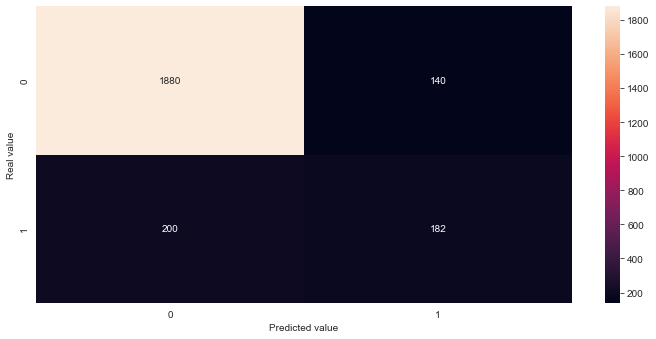

accuracy  score: 0.858451290591174 %
auc  score: 0.7035664299414235 
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2020
         1.0       0.57      0.48      0.52       382

    accuracy                           0.86      2402
   macro avg       0.73      0.70      0.72      2402
weighted avg       0.85      0.86      0.85      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.86
Precision: 0.57
Recall: 0.48
F1: 0.52


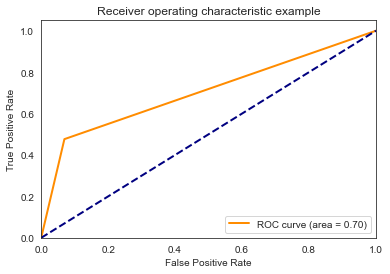

0.5170454545454545

In [528]:
score = train_and_test(AdaBoostClassifier(), X_train_l1, X_test_l1, y_train, y_test, 'AdaBoostClassifier')
score

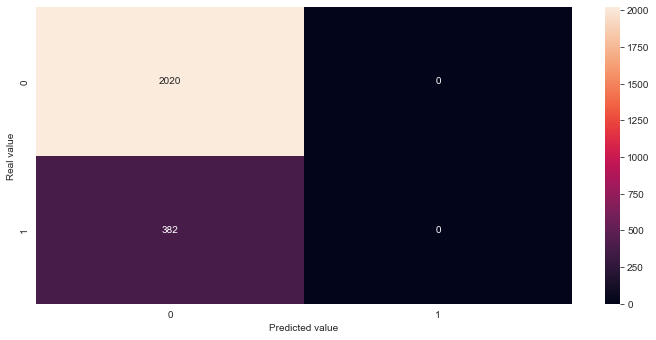

accuracy  score: 0.8409658617818485 %
auc  score: 0.5 
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2020
         1.0       0.00      0.00      0.00       382

    accuracy                           0.84      2402
   macro avg       0.42      0.50      0.46      2402
weighted avg       0.71      0.84      0.77      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.84
Precision: 0.00
Recall: 0.00
F1: 0.00


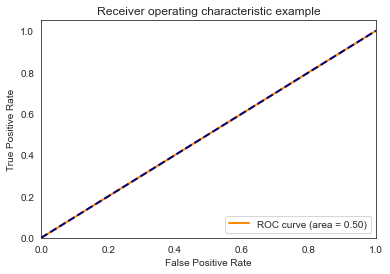

0.0

In [529]:
from sklearn.dummy import DummyClassifier

score = train_and_test(DummyClassifier(), X_train_l1, X_test_l1, y_train, y_test, 'DummyClassifier')
score

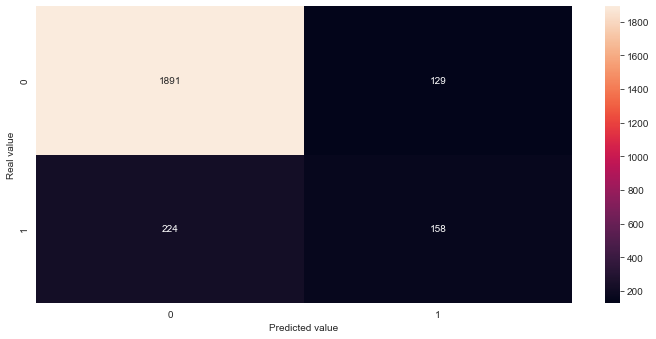

accuracy  score: 0.8530391340549542 %
auc  score: 0.6748755896532062 
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2020
         1.0       0.55      0.41      0.47       382

    accuracy                           0.85      2402
   macro avg       0.72      0.67      0.69      2402
weighted avg       0.84      0.85      0.84      2402

Train set accurecy: 0.87 
Test set accurecy: 0.86 
Accuracy: 0.85
Precision: 0.55
Recall: 0.41
F1: 0.47


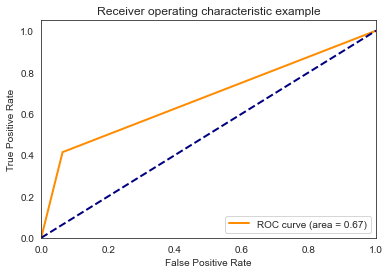

0.47234678624813153

In [314]:
score = train_and_test(GradientBoostingClassifier(), X_train_l1, X_test_l1, y_train, y_test)
score

In [364]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

pipline_model = make_pipeline(RFE(estimator=DecisionTreeClassifier(), n_features_to_select= 8),
                              StandardScaler(),
                              PolynomialFeatures(degree=2),
                              AdaBoostClassifier())

pipline_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=8)),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('adaboostclassifier', AdaBoostClassifier())])>

In [148]:

param_grid = {'rfe__n_features_to_select': np.arange(4,9),
              'polynomialfeatures__degree': np.arange(6,9)}

grid = GridSearchCV(pipline_model, param_grid,)

In [149]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=LogisticRegression(),
                                            n_features_to_select=8)),
                                       ('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier())]),
             param_grid={'polynomialfeatures__degree': array([6, 7, 8]),
                         'rfe__n_features_to_select': array([4, 5, 6, 7, 8])})

In [150]:
grid.best_params_

{'polynomialfeatures__degree': 6, 'rfe__n_features_to_select': 5}

In [151]:
grid.best_score_

0.8605257435282055

In [531]:
best_model = make_pipeline(RFE(estimator=DecisionTreeClassifier(), n_features_to_select= 5),
                              PolynomialFeatures(degree=2),
                              AdaBoostClassifier(),)

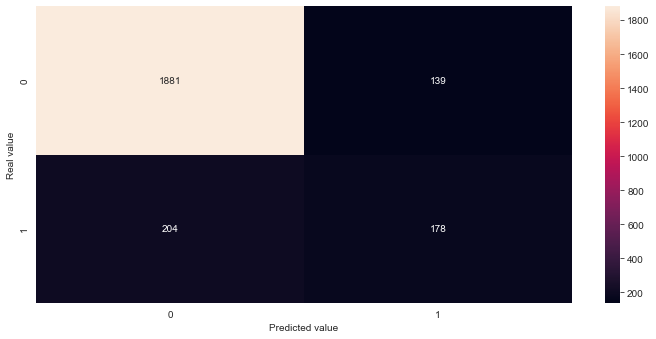

accuracy  score: 0.8572023313905079 %
auc  score: 0.6985783525996578 
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2020
         1.0       0.56      0.47      0.51       382

    accuracy                           0.86      2402
   macro avg       0.73      0.70      0.71      2402
weighted avg       0.85      0.86      0.85      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.86
Precision: 0.56
Recall: 0.47
F1: 0.51


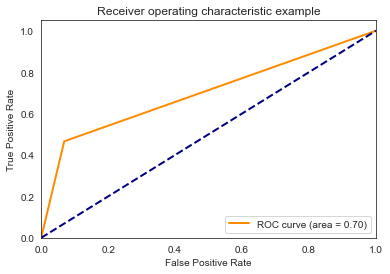

0.5092989985693849

In [532]:
train_and_test(best_model, X_train, X_test, y_train, y_test,'RFE->PolynomialFeatures->AdaBoostClassifier')

In [533]:

pipline_model2 = make_pipeline(RFE(estimator=LogisticRegression(), n_features_to_select= 8),
                              PolynomialFeatures(degree=2),
                              AdaBoostClassifier())

pipline_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=8)),
                ('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('adaboostclassifier', AdaBoostClassifier())])>

In [534]:

param_grid = {'rfe__n_features_to_select': np.arange(4,9),
              'polynomialfeatures__degree': np.arange(2,7)}

grid = GridSearchCV(pipline_model2, param_grid,)

In [374]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=LogisticRegression(),
                                            n_features_to_select=8)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier())]),
             param_grid={'polynomialfeatures__degree': array([2, 3, 4, 5, 6]),
                         'rfe__n_features_to_select': array([4, 5, 6, 7, 8])})

In [369]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'rfe__n_features_to_select': 5}

In [506]:

best_model2 = make_pipeline(RFE(estimator=LogisticRegression(), n_features_to_select= 5),
                              PolynomialFeatures(degree=2),
                              AdaBoostClassifier())

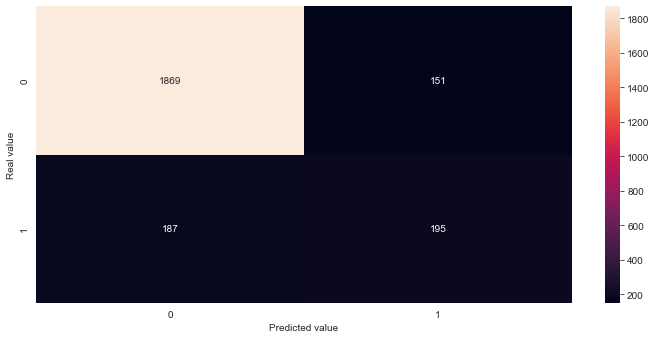

accuracy  score: 0.8592839300582847 %
auc  score: 0.7178593644704785 
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      2020
         1.0       0.56      0.51      0.54       382

    accuracy                           0.86      2402
   macro avg       0.74      0.72      0.73      2402
weighted avg       0.85      0.86      0.86      2402

Train set accurecy: 1.00 
Test set accurecy: 0.85 
Accuracy: 0.86
Precision: 0.56
Recall: 0.51
F1: 0.54


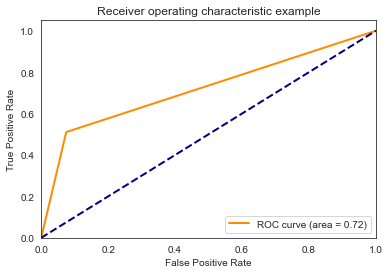

0.5357142857142857

In [543]:
train_and_test(best_model2, X_train, X_test, y_train, y_test, 'RFE->PolynomialFeatures->AdaBoostClassifier')

In [548]:
pd.DataFrame(models_fscore,index = ['a','b']).transpose()

a         b
DecisionTreeClassifier                       0.332075  0.332075
RandomForestClassifier                       0.400000  0.400000
LogisticRegression                           0.256917  0.256917
KNeighborsClassifier                         0.149194  0.149194
AdaBoostClassifier                           0.517045  0.517045
DummyClassifier                              0.000000  0.000000
RFE->PolynomialFeatures->AdaBoostClassifier  0.535714  0.535714